In [1]:
import networkx as nx
from statistics import mean
from itertools import combinations
import matplotlib.pyplot as plt
from random import random, randrange, sample
import collections
import numpy as np
import matplotlib.pyplot as plt

## Erdos-Renyi & r-redular graph

In [2]:
def p_ER(n, p):
    G = nx.Graph()
    nodes = range(1, n+1)
    G.add_nodes_from(nodes)
    # Explore all the combinations
    for edge in combinations(G.nodes(), 2):
        if random() < p:
            # same as G.add_edge(edge[0], edge[1])
            G.add_edge(*edge)

    return G

def r_regular(n, r):
    G = nx.Graph()
    nodes = range(1, n+1)
    G.add_nodes_from(nodes)

    random_order = sample(G.nodes(), n)
    for idx, x in enumerate(random_order):
        # Check for the neighbors of x
        neighbors = list(G.neighbors(x))

        # We denote k as the number of neighbors for node x
        k = len(neighbors)

        # If the actual node x has r neighbors, continue to next node
        if k == r:
            continue

        # Set of possible new nodes that could be connected to x
        possibles = list(set(G.nodes()).difference(set(neighbors)).difference(set([x]))) 

        while k != r:
            # Select randomly one element
            p = sample(possibles, 1)[0]
            
            # Remove the element
            possibles.remove(p)

            # If neighbors(p) add edge (x, p) and set k = len(neighbors(x))
            if len(list(G.neighbors(p))) < r:
                G.add_edge(x, p)
                k = len(list(G.neighbors(x)))

            # If empty(possibles) == T and k < r no more possibilities
            if possibles == [] and k < r:
                return False, G
    return True, G


def check_r_regular(n, r, G):
    for node in G.nodes():
        n = len(list(G.neighbors(node)))
        if n != r:
            return False
    return True



Check r_regular: True


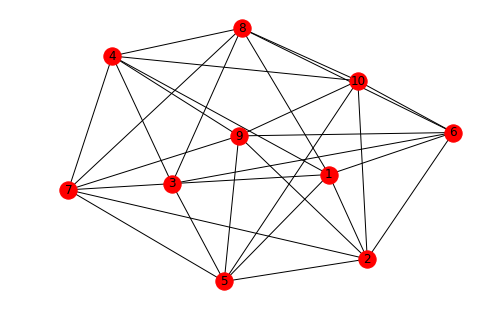

In [19]:
n, r = 10, 6
is_r_regular, myGraph = r_regular(n, r)
print("Check r_regular:", check_r_regular(n, r, myGraph))
nx.draw(myGraph, with_labels = True)
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
0.4888888888888889


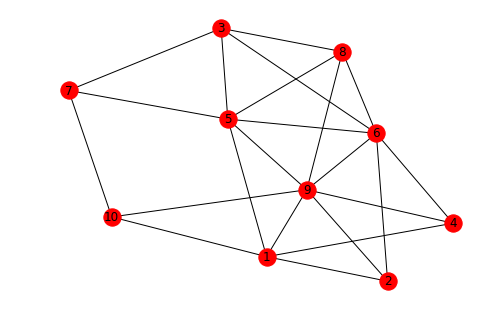

In [4]:
n, p = 10, 0.35
myGraph = p_ER(n, p)
print(myGraph.nodes())
print(len(myGraph.edges())/(n*(n-1)/2.0))
nx.draw(myGraph, with_labels = True)
plt.show()


## Breadth First Search (BFS)
The complexity of algorithm is O(|V|+|E|), where V is the number of vertex and E is the number of the edges of a given graph.

In [18]:
def bfs(graph, root):
    #BFS Algorithm that return a set of node reached from a given index 
    visited, queue = set(), collections.deque([root])
    visited.add(root)
    while queue: 
        vertex = queue.popleft()
        for neighbour in graph[vertex]: 
            if neighbour not in visited: 
                visited.add(neighbour) 
                queue.append(neighbour)
    return(visited)

def check_bfs(graph):
    # Function that use BFS Algorithm to check if a given graph is connected
    check = True
    for i in list(graph.nodes()):
        if len(bfs(graph,i)) != len(list(graph.nodes())):
            check = False
    return check

## Irreducibility
We obtain the adjacency matrix $A$, and check if for each pair $(i,j)$ there is a power m such that $(A^{m}_{i,j})>0$, so the matrix is irreducible and the graph is connected.

In [ ]:
def irreducibility(graph):
    result = np.eye(len(nx.nodes(graph)))
    M = nx.adjacency_matrix(graph).todense()
    for i in range(1, len(nx.nodes(graph))):
        result += np.linalg.matrix_power(M, i)
    if result.all()>0:
        print("Connected")
    else:
        print("Not Conected")

## Eigenvalue of the Laplacian matrix


In [22]:
def eigen_connectivity(graph):
    L = nx.normalized_laplacian_matrix(graph)
    eig = np.linalg.eigvals(L.A)
    if eig[0] == np.float(0):
        print("Connected")
    elif np.count_nonzero(eig==0) > 0 | list(eig).count(np.float(2)):
        print("Not Connected")
    else:
        print("Connected")


## ToR Network

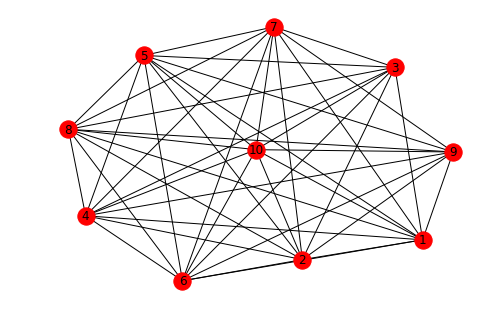

Is connect?
True
The shortest path
1
H
1.1226666666666667
All shortest paths
{1: {1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}, 2: {2: 0, 1: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}, 3: {3: 0, 1: 1, 2: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 10: 1, 9: 2}, 4: {4: 0, 1: 1, 2: 1, 3: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}, 5: {5: 0, 1: 1, 2: 1, 3: 1, 4: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}, 6: {6: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 7: 1, 8: 1, 9: 1, 10: 1}, 7: {7: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 8: 1, 9: 1, 10: 1}, 8: {8: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 9: 1, 10: 1}, 9: {9: 0, 1: 1, 2: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 10: 1, 3: 2}, 10: {10: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}}


In [18]:

ToR=p_ER(10, 0.88)
nx.draw(ToR, with_labels = True)
plt.show()
print("Is connect?")
print(check_bfs(ToR))
shortest_paths=dict(nx.all_pairs_dijkstra_path_length(ToR,weight=None))
print("The shortest path")
print(min(shortest_paths))
h=list()
for i in range(0,100):
    ToR=p_ER(10, 0.88)
    t=check_bfs(ToR)
    if(t==True):
        h.append(nx.average_shortest_path_length(ToR))
h_avg=mean(h)
print("H")
print(h_avg)
print("All shortest paths")
print(shortest_paths)


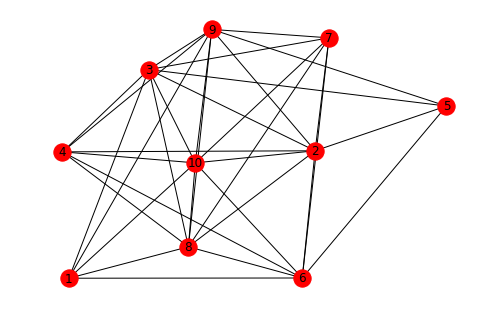

Is connect?
True
The shortest path
1
1.1875555555555555
All shortest paths
{1: {1: 0, 8: 1, 9: 1, 10: 1, 3: 1, 6: 1, 4: 2, 7: 2, 2: 2, 5: 2}, 2: {2: 0, 8: 1, 10: 1, 5: 1, 7: 1, 3: 1, 6: 1, 9: 1, 4: 1, 1: 2}, 3: {3: 0, 8: 1, 2: 1, 9: 1, 10: 1, 7: 1, 5: 1, 1: 1, 4: 1, 6: 2}, 4: {4: 0, 8: 1, 2: 1, 9: 1, 10: 1, 3: 1, 6: 1, 1: 2, 7: 2, 5: 2}, 5: {5: 0, 2: 1, 9: 1, 3: 1, 6: 1, 8: 2, 10: 2, 7: 2, 4: 2, 1: 2}, 6: {6: 0, 8: 1, 2: 1, 10: 1, 1: 1, 5: 1, 4: 1, 7: 1, 9: 2, 3: 2}, 7: {7: 0, 8: 1, 2: 1, 9: 1, 10: 1, 3: 1, 6: 1, 1: 2, 4: 2, 5: 2}, 8: {8: 0, 10: 1, 9: 1, 1: 1, 4: 1, 6: 1, 7: 1, 3: 1, 2: 1, 5: 2}, 9: {9: 0, 8: 1, 2: 1, 10: 1, 3: 1, 1: 1, 7: 1, 5: 1, 4: 1, 6: 2}, 10: {10: 0, 8: 1, 2: 1, 9: 1, 6: 1, 7: 1, 1: 1, 4: 1, 3: 1, 5: 2}}


In [20]:
is_r_regular, ToR = r_regular(10, 8)
nx.draw(ToR, with_labels = True)
plt.show()
print("Is connect?")
print(check_bfs(ToR))
shortest_paths=dict(nx.all_pairs_dijkstra_path_length(ToR,weight=None))
print("The shortest path")
print(min(shortest_paths))
h=list()
for i in range(0,100):
    is_r_regular, ToR = r_regular(10, 8)
    t=check_bfs(ToR)
    if(t==True):
        h.append(nx.average_shortest_path_length(ToR))
h_avg=mean(h)
print(h_avg)
print("All shortest paths")
print(shortest_paths)

In [189]:
def xfrange(start, stop, step):
    i = 0
    while start + i * step < stop:
        yield start + i * step
        i += 1

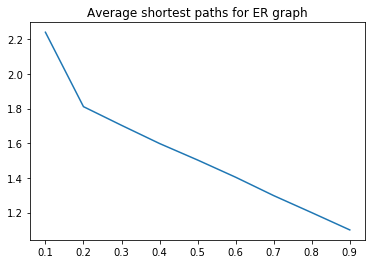

1.5399551066217732


In [190]:
SP=list()
num=list()
SPs=list()
for p in xfrange(0,1,0.1):
    SP=list()
    for i in range(0,100):
        g = p_ER(100, p)
        t=check_bfs(g)
        if(t==True):
            h=nx.average_shortest_path_length(g,weight=None)
            SP.append(h)
    if(len(SP) > 0):
        SPs.append(mean(SP))
        num.append(p)
plt.title("Average shortest paths for ER graph")
plt.plot(num,SPs)
plt.show()
h=mean(SPs)
print(h)

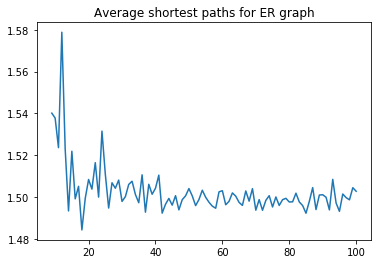

1.5027634331680726


In [8]:
SP=list()
num=list()
SPs=list()
for n in range(9,101):
    SP=list()
    '''p=float(8)/float(n-1)'''
    for i in range(0,100):
        g = p_ER(n, 0.5)
        t=check_bfs(g)
        if(t==True):
            h=nx.average_shortest_path_length(g,weight=None)
            SP.append(h)
    if(len(SP) > 0):
        SPs.append(mean(SP))
        num.append(n)
plt.title("Average shortest paths for ER graph")
plt.plot(num,SPs)
plt.show()
h=mean(SPs)
print(h)

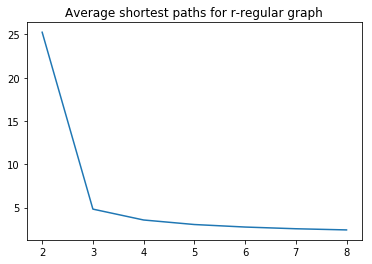

6.347922077922078


In [193]:
SP=list()
num=list()
SPs=list()
for r in range(1,9):
    SP=list()
    for i in range(0,100):
        is_r_regular, g = r_regular(100, r)
        t=check_bfs(g)
        if(t==True):
            h=nx.average_shortest_path_length(g,weight=None)
            SP.append(h)
    if(len(SP) > 0):
        SPs.append(mean(SP))
        num.append(r)
plt.title("Average shortest paths for r-regular graph")
plt.plot(num,SPs)
plt.show()
h=mean(SPs)
print(h)

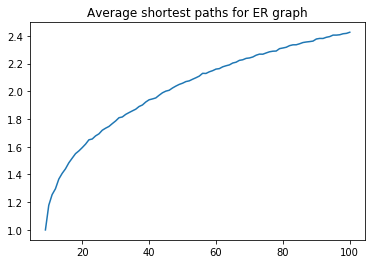

2.0213763474315964


In [196]:
SP=list()
num=list()
SPs=list()
for n in range(9,101):
    SP=list()
    for i in range(0,100):
        is_r_regular, g = r_regular(n, 8)
        t=check_bfs(g)
        if(t==True):
            h=nx.average_shortest_path_length(g,weight=None)
            SP.append(h)
    if(len(SP) > 0):
        SPs.append(mean(SP))
        num.append(n)
plt.title("Average shortest paths for r-regular graph")
plt.plot(num,SPs)
plt.show()
h=mean(SPs)
print(h)

## Throughput Performance

In [116]:
def throughput(graph,n,t,p,r,h):
    if(t==2):
        m=float(n*r)/float(2)
    else:
        m=float(p*n*(n-1))/float(2)
    vf=float(n*(n-1))/float(2)
    TH=float(m)/float(h*vf)
    return float(TH)

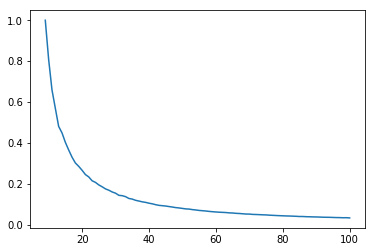

In [130]:
thb=list()
num=list()
thbs=list()
for n in range(9,101):
    p=float(8)/float(n-1)
    thb=list()
    for i in range(0,100):
        th=0
        g=p_ER(n, p)
        t=check_bfs(g)
        if(t==True):
            h=nx.average_shortest_path_length(g,weight=None)
            th=throughput(g,n,1,p,8,h)
            thb.append(th)
    if(len(thb) > 0):
        thbs.append(mean(thb))
        num.append(n)
plt.title("Throughput performance for ER graph")
plt.plot(num,thbs)
plt.show()

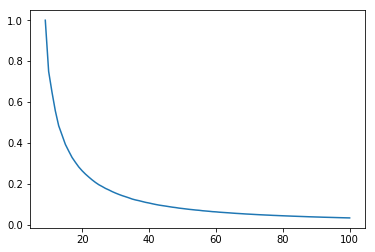

In [132]:
thb=list()
num=list()
thbs=list()
for n in range(9,101):
    thb=list()
    for i in range(0,100):
        th=0
        is_r_regular, ToR = r_regular(n, 8)
        t=check_bfs(ToR)
        if(t==True):
            h=nx.average_shortest_path_length(ToR,weight=None)
            th=throughput(ToR,n,2,p,8,h)
            thb.append(th)
    if(len(thb) > 0):
        thbs.append(mean(thb))
        num.append(n)
plt.title("Throughput performance for r-regular graph")
plt.plot(num,thbs)
plt.show()

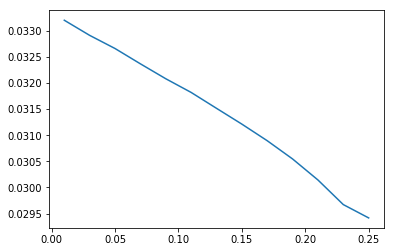

In [170]:
thb=list()
num=list()
thbs=list()
q=[0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19,0.21,0.23,0.25]
thb=list()
thbs=list()
num=list()
for i in q:
    thb=list()
    for n in range(0,100):
        is_r_regular, ToR = r_regular(100, 8) 
        must_be_removed=list()
        for e in ToR.edges():
            if random() < i:
                must_be_removed.append(e)
        for edge in must_be_removed:
            ToR.remove_edge(*edge)
        t=check_bfs(ToR)
        if(t==True):
            h=nx.average_shortest_path_length(ToR,weight=None)
            th=throughput(ToR,100,2,0,8,h)
            thb.append(th)
    if(len(thb) > 0):
        thbs.append(mean(thb))
        num.append(i)
plt.title("Reliability performance for r-regular graph")
plt.plot(num,thbs)
plt.show()

## Reliability performance

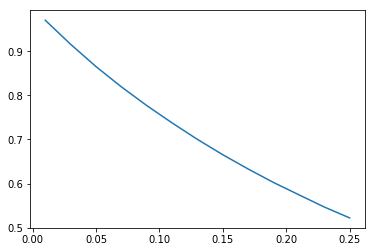

In [171]:
q=[0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19,0.21,0.23,0.25]
thb=list()
thbs=list()
num=list()
for i in q:
    thb=list()
    for n in range(0,100):
        ToR=p_ER(100,99)
        must_be_removed=list()
        for e in ToR.edges():
            if random() < i:
                must_be_removed.append(e)
        for edge in must_be_removed:
            ToR.remove_edge(*edge)
        t=check_bfs(ToR)
        if(t==True):
            h=nx.average_shortest_path_length(ToR,weight=None)
            th=throughput(ToR,100,1,99,8,h)
            thb.append(th)
    if(len(thb) > 0):
        thbs.append(mean(thb))
        num.append(i)
plt.title("Reliability performance for ER graph")
plt.plot(num,thbs)
plt.show()